Importing Libraries


In [59]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

Loading the Dataset

In [60]:
# creating database connection
conn = sqlite3.connect('inventory.db')

# fetching vendor summary data 
df = pd.read_sql_query("select * from vendor_sales_summary", conn)
df.head()

,VendorNumber,Brand,PurchasePrice,VendorName,Description,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio
0,12546,1476,16.05,JIM BEAM BRANDS COMPANY,Jim Beam Traveler,21.99,1750,2550,40927.50,0.0,0.0,0.0,0.0,123880.97,-40927.50,-inf,0.0,0.0
1,480,4227,14.17,BACARDI USA INC,Bacardi Superior Rum Trav,17.99,1750,2418,34263.06,0.0,0.0,0.0,0.0,89286.27,-34263.06,-inf,0.0,0.0
2,480,3858,17.77,BACARDI USA INC,Grey Goose Vodka,23.99,750,1847,32821.19,0.0,0.0,0.0,0.0,89286.27,-32821.19,-inf,0.0,0.0
3,4425,3405,23.19,MARTIGNETTI COMPANIES,Tito's Handmade Vodka,28.99,1750,997,23120.43,0.0,0.0,0.0,0.0,144929.24,-23120.43,-inf,0.0,0.0
4,3960,4261,16.17,DIAGEO NORTH AMERICA INC,Capt Morgan Spiced Rum,22.99,1750,1241,20066.97,0.0,0.0,0.0,0.0,257032.07,-20066.97,-inf,0.0,0.0


In [61]:
df.to_csv("vendor_sales_summary.csv", index=False)


EXPLORATORY DATA ANALYSIS

- Previously we examined the vrious tables in the data set to identify key variables , understand their relationship , and determine which ones should be included in te final analysis .
- In the phase of EDA , we will analyse the resultant table to gain insights into the distribution of each column .This will help us understan data patterns , identify anomalies , and ensure data quality before preceding with future analysis .

In [62]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,1572.0,6.091348e+03,9804.470539,105.00,2242.00,3960.00,9552.00,90053.000000
Brand,1572.0,1.456050e+04,13388.399829,62.00,3888.50,8391.00,23482.75,47014.000000
PurchasePrice,1572.0,1.212092e+01,12.172918,0.71,6.42,8.90,14.17,240.590000
ActualPrice,1572.0,1.780429e+01,16.626510,0.99,9.99,13.99,19.99,319.990000
Volume,1572.0,9.613747e+02,598.000092,50.00,750.00,750.00,750.00,5000.000000
TotalPurchaseQuantity,1572.0,6.126018e+01,152.011312,1.00,12.00,22.50,46.00,2550.000000
TotalPurchaseDollars,1572.0,6.473345e+02,2163.643529,3.24,103.16,195.96,418.62,40927.500000
TotalSalesQuantity,1572.0,1.250000e+00,7.787713,0.00,0.00,0.00,0.00,155.000000
TotalSalesDollars,1572.0,2.130789e+01,148.080758,0.00,0.00,0.00,0.00,3599.000000
TotalSalesPrice,1572.0,1.003573e+01,49.028407,0.00,0.00,0.00,0.00,647.820000


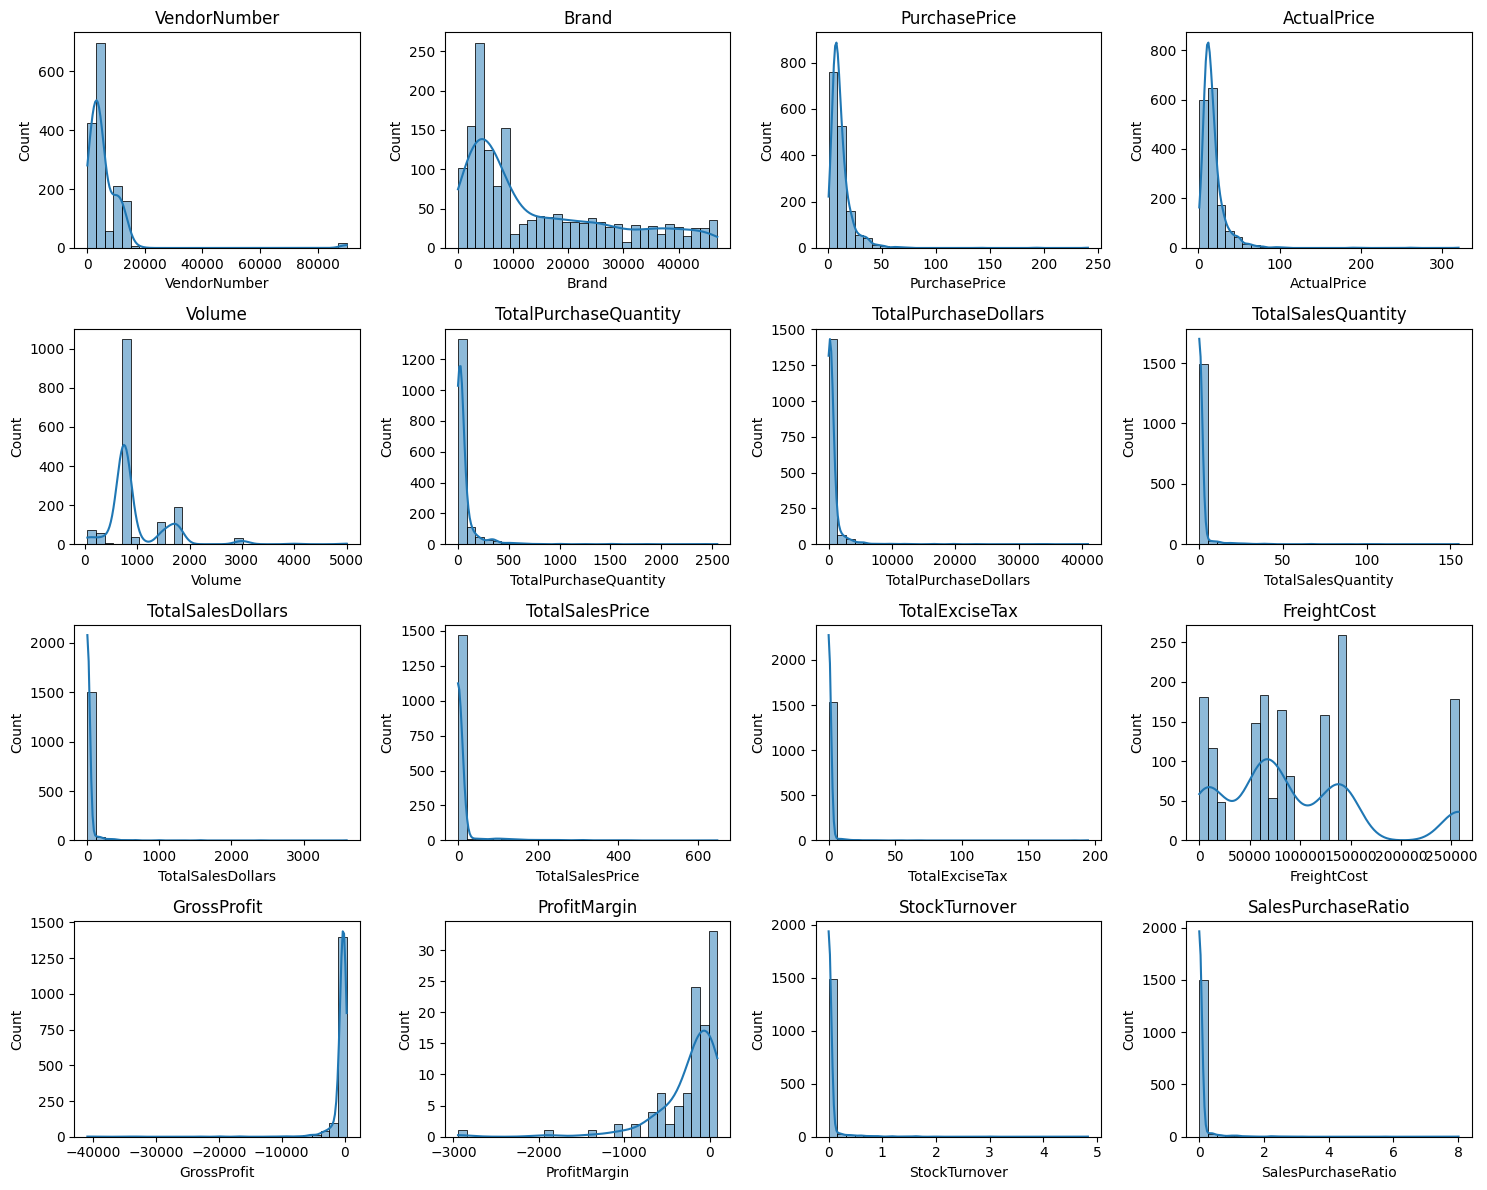

In [63]:
# Distribution plots for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Create subplots grid
fig, axes = plt.subplots(4, 4, figsize=(15, 12))  # 4x4 grid, adjust figsize
axes = axes.flatten()  # flatten 2D array of axes

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()  # call only once
plt.show()


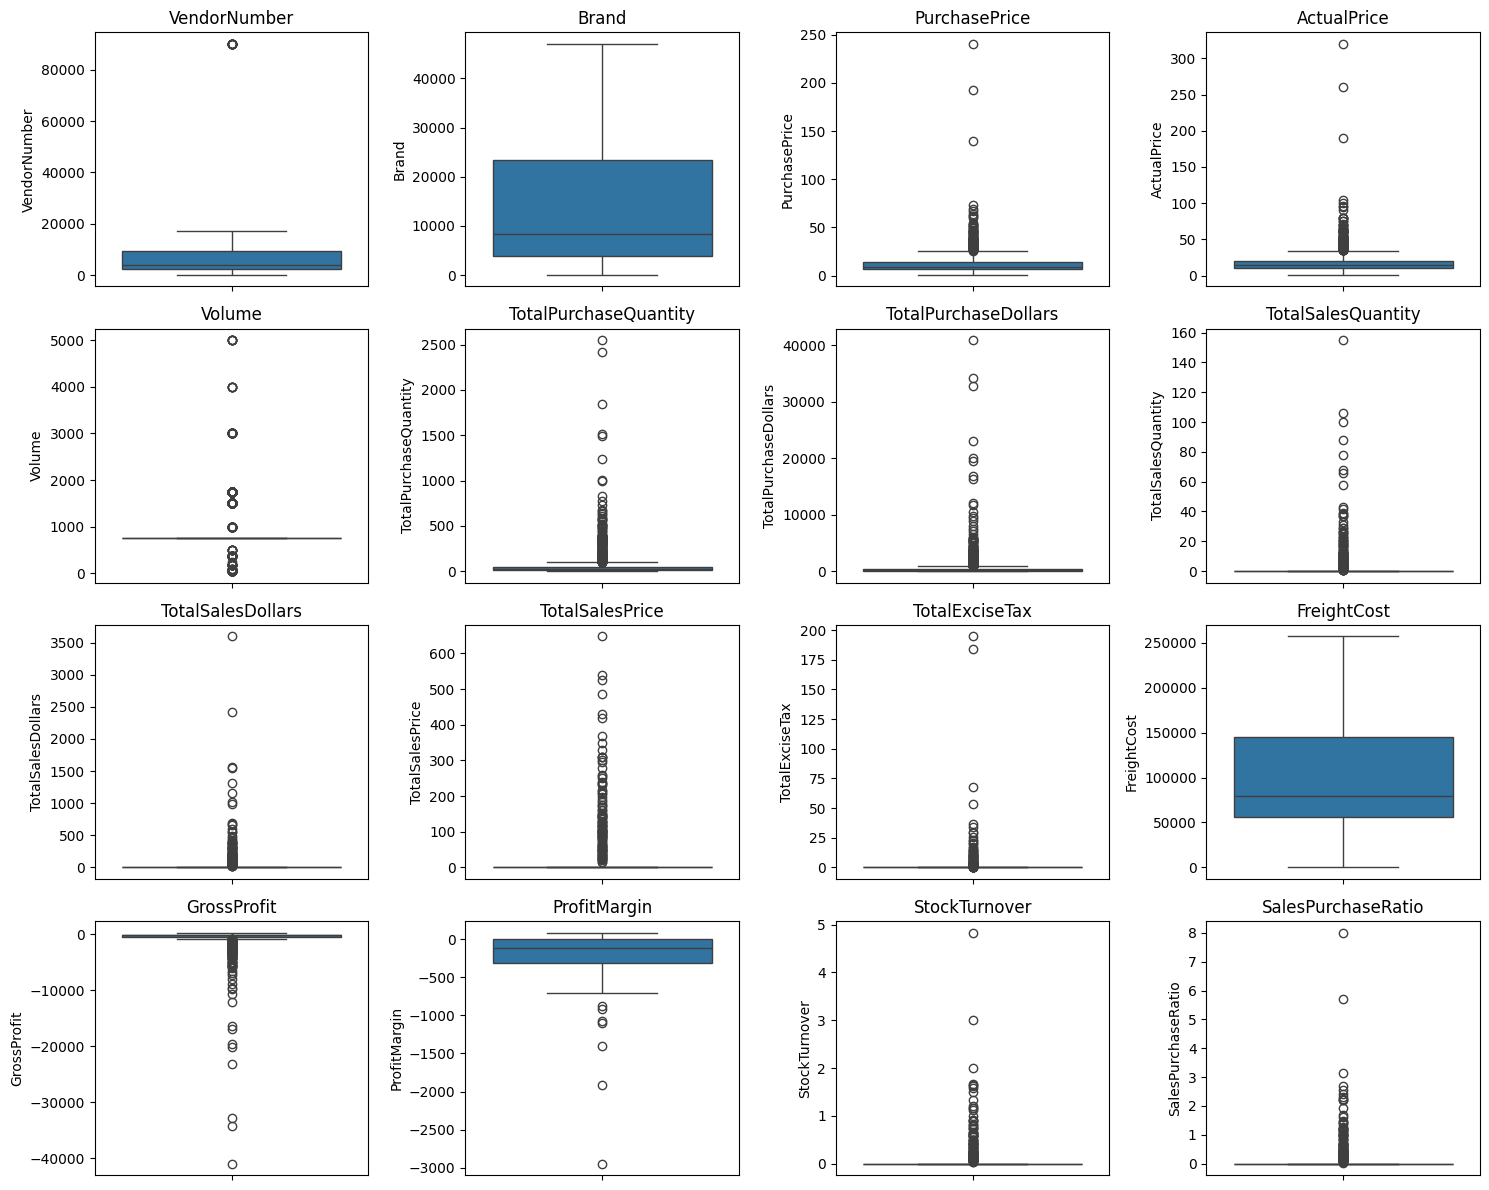

In [64]:

# Create subplots grid
fig, axes = plt.subplots(4, 4, figsize=(15, 12))  # 4x4 grid
axes = axes.flatten()  # flatten 2D array of axes

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])  # boxplot on each subplot
    axes[i].set_title(col)

# Hide unused subplots if columns < 16
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


SUMMARY STATISTICS INSIGHTS:

Negative & Zero values :
- Gross Profit:Minimum represents -ve,including losses. Some products or transaction may be selling at loss due to high costs or selling at discounts lower than the purchase price.
- Profit Margin : Has a minimum of -∞, which suggestscases where revenue is zero or even lower than the costs.
- Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow_moving or obslete stock.

Outliers indicated by high standard Deviation:
- Purchase & Actual Price: The max value are significantly higher than the mean value , indicating potential premium products.
- Freight Cost : Huge variation , suggests logistics inefficiently or bulk shipments .
- Stock Turnover: Implying some products sell extremely fast while others remain in stock indefinetly . Value more than 1 indicates that sold quantity for that product is higher than purchase quantity due to either sales are being fullfilled from older stock.

In [65]:
# lets filter the data by removing inconsistencies
df = pd.read_sql_query("""select * 
from vendor_sales_summary
where GrossProfit > 0
and ProfitMargin > 0
and TotalSalesQuantity > 0""", conn)

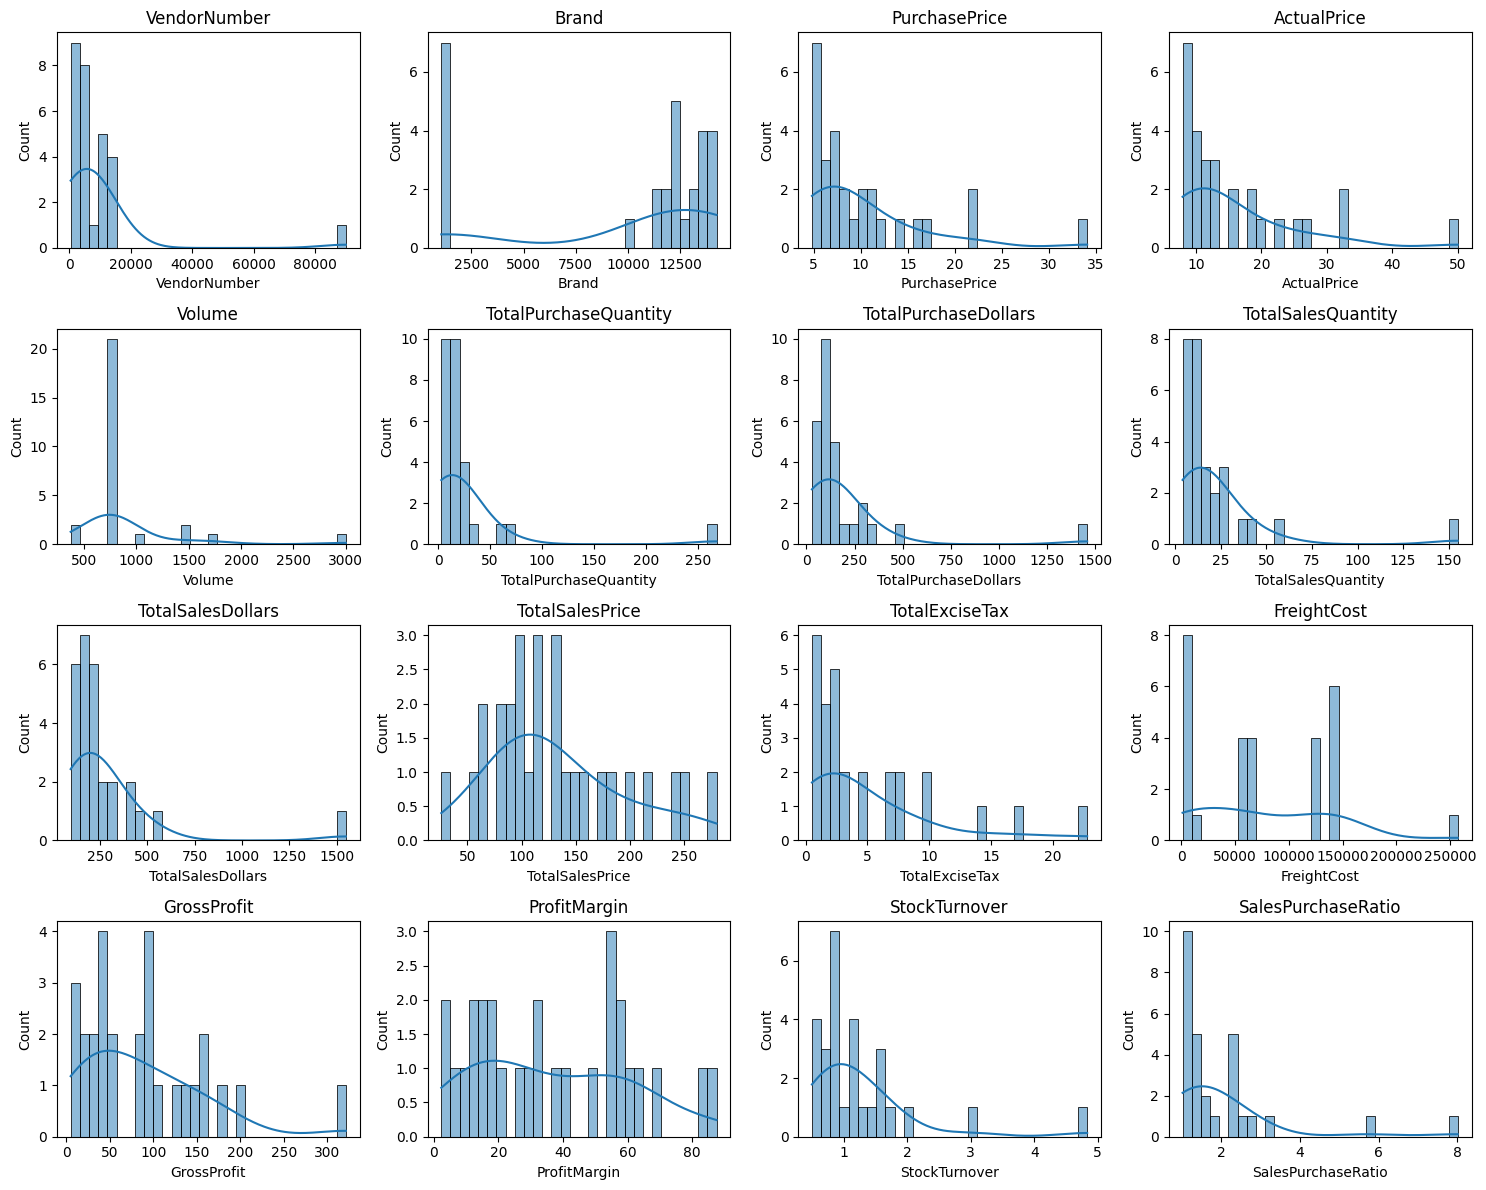

In [66]:
# Distribution plots for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Create subplots grid
fig, axes = plt.subplots(4, 4, figsize=(15, 12))  # 4x4 grid, adjust figsize
axes = axes.flatten()  # flatten 2D array of axes

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()  # call only once
plt.show()

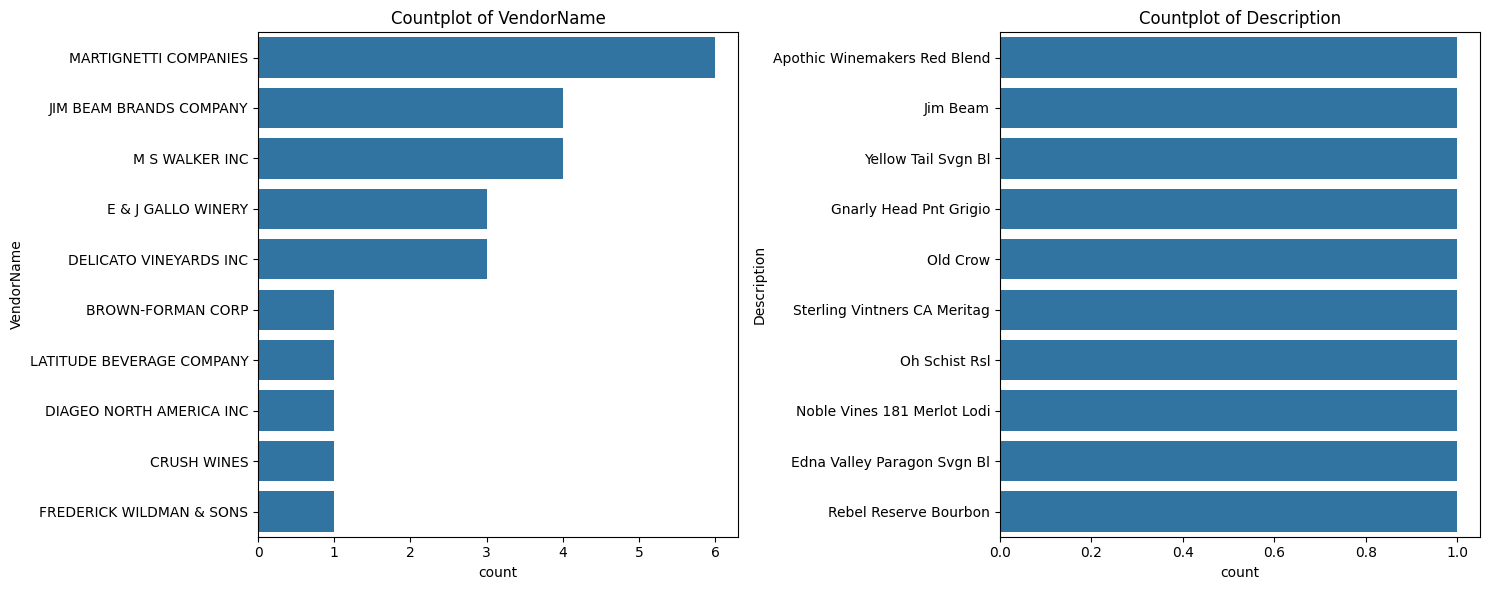

In [67]:


categorical_cols = ["VendorName", "Description"]

# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, col in enumerate(categorical_cols):
    sns.countplot(
        y=df[col],
        order=df[col].value_counts().index[:10],
        ax=axes[i]  # assign subplot axis
    )
    axes[i].set_title(f'Countplot of {col}')

plt.tight_layout()
plt.show()


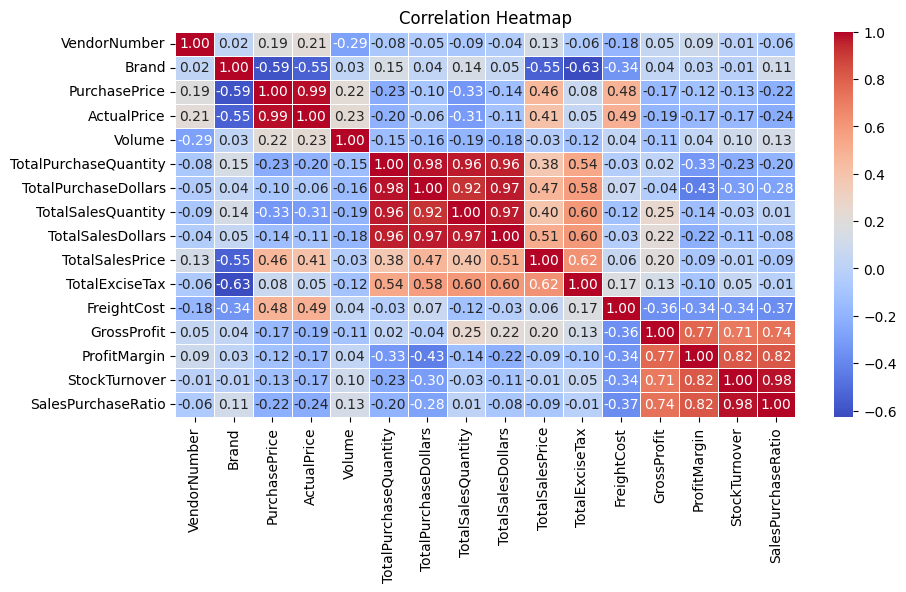

In [68]:
# Correlation Heatmap
plt.figure(figsize=(10, 5))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

CORRELATION INSIGHTS 
- Purchase price has weak correlation with TotalSalesDollars and GrossProfit,suggesting that price that variation do not significantly impact sales revenue or profit.
- Negative correlation between profit margin & total sales price suggested that as sales price increases , margin decreases , possibly due to competitive pricing pressures. 
- Strong correlation between total purchase quantity and total sales quantity , confirming efficient inventory turnover.
- StockTurnover has weak negative correlation with both GrossProfit and Profit, indicating that faster turnover does not neccesarily result in higher profitability.

------------------------------------------------------------------------------------------------------------------------------------------------------------

DATA ANALYSIS 

Identify Brands that needs Promotional or Pricing Adjustment which exihibit lower sales performance but higher profit margins.

In [69]:
Brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',
    'ProfitMargin': 'mean'
}).reset_index()

In [70]:
low_sales_theshold = Brand_performance['TotalSalesDollars'].quantile(0.25)
high_margin_threshold = Brand_performance['ProfitMargin'].quantile(0.75)

In [71]:
low_sales_theshold

np.float64(148.39499999999998)

In [72]:
high_margin_threshold

np.float64(55.525578626079394)

In [73]:
# Filter brands with low sales but high profit margins
target_brands = Brand_performance[
    (Brand_performance['TotalSalesDollars'] <= low_sales_theshold) &
    (Brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values(by=['TotalSalesDollars']))

Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
27,Yellow Tail Svgn Bl,94.93,57.020963
10,Gnarly Head Pnt Grigio,133.87,68.148203


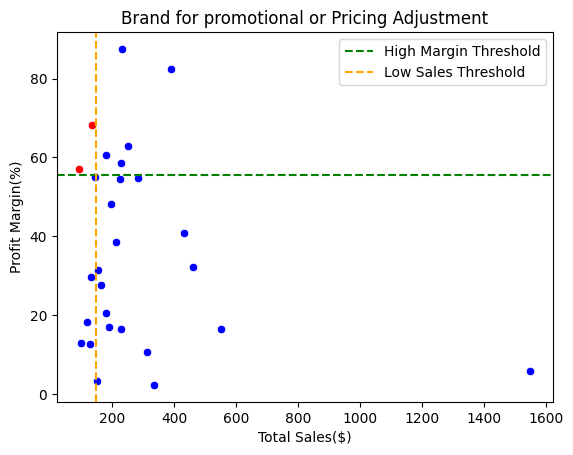

In [74]:
plt.Figure(figsize=(10,6))
sns.scatterplot(data=Brand_performance, x='TotalSalesDollars', y='ProfitMargin',color='blue')
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin',color='red')

plt.axhline(y=high_margin_threshold, color='green', linestyle='--', label='High Margin Threshold')
plt.axvline(x=low_sales_theshold, color='orange', linestyle='--', label='Low Sales Threshold')

plt.xlabel('Total Sales($)')
plt.ylabel('Profit Margin(%)')
plt.title('Brand for promotional or Pricing Adjustment')
plt.legend()
plt.show()


Which vendor and brands demonstrate the highest sales performance?

In [75]:
def format_dollars(value):
    if value >= 1_000:
        return f"${value/1_000:.2f}K"
    else:
        return str(value)

In [76]:
# Top Vendors & Brands by Sales Performance
top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)
top_vendors

VendorName
E & J GALLO WINERY             1845.23
MARTIGNETTI COMPANIES          1264.24
JIM BEAM BRANDS COMPANY        1210.03
M S WALKER INC                 1060.96
DIAGEO CHATEAU ESTATE WINES     389.61
DELICATO VINEYARDS INC          360.72
LATITUDE BEVERAGE COMPANY       284.71
LUXCO INC                       251.88
BANFI PRODUCTS CORP             231.71
FREDERICK WILDMAN & SONS        227.81
Name: TotalSalesDollars, dtype: float64

In [77]:
top_brands

Description
Apothic Winemakers Red Blend    1548.45
Jim Beam                         550.42
Angeline Pnt Nr                  461.58
Layer Cake Primitivo Puglia      431.73
Sterling Vintners CA Meritag     389.61
Knob Creek Rye                   335.88
Duckhorn Decoy Pnt Nr            311.88
Ninety+Cellars Lot 2 Svgn Bl     284.71
Rebel Reserve Bourbon            251.88
C Y Toro Frontera Malbec         231.71
Name: TotalSalesDollars, dtype: float64

In [78]:
top_brands.apply(lambda x: format_dollars(x))

Description
Apothic Winemakers Red Blend                $1.55K
Jim Beam                                    550.42
Angeline Pnt Nr                 461.58000000000004
Layer Cake Primitivo Puglia                 431.73
Sterling Vintners CA Meritag                389.61
Knob Creek Rye                              335.88
Duckhorn Decoy Pnt Nr                       311.88
Ninety+Cellars Lot 2 Svgn Bl                284.71
Rebel Reserve Bourbon                       251.88
C Y Toro Frontera Malbec                    231.71
Name: TotalSalesDollars, dtype: object

In [79]:
top_vendors.apply(lambda x: format_dollars(x))

VendorName
E & J GALLO WINERY             $1.85K
MARTIGNETTI COMPANIES          $1.26K
JIM BEAM BRANDS COMPANY        $1.21K
M S WALKER INC                 $1.06K
DIAGEO CHATEAU ESTATE WINES    389.61
DELICATO VINEYARDS INC         360.72
LATITUDE BEVERAGE COMPANY      284.71
LUXCO INC                      251.88
BANFI PRODUCTS CORP            231.71
FREDERICK WILDMAN & SONS       227.81
Name: TotalSalesDollars, dtype: object

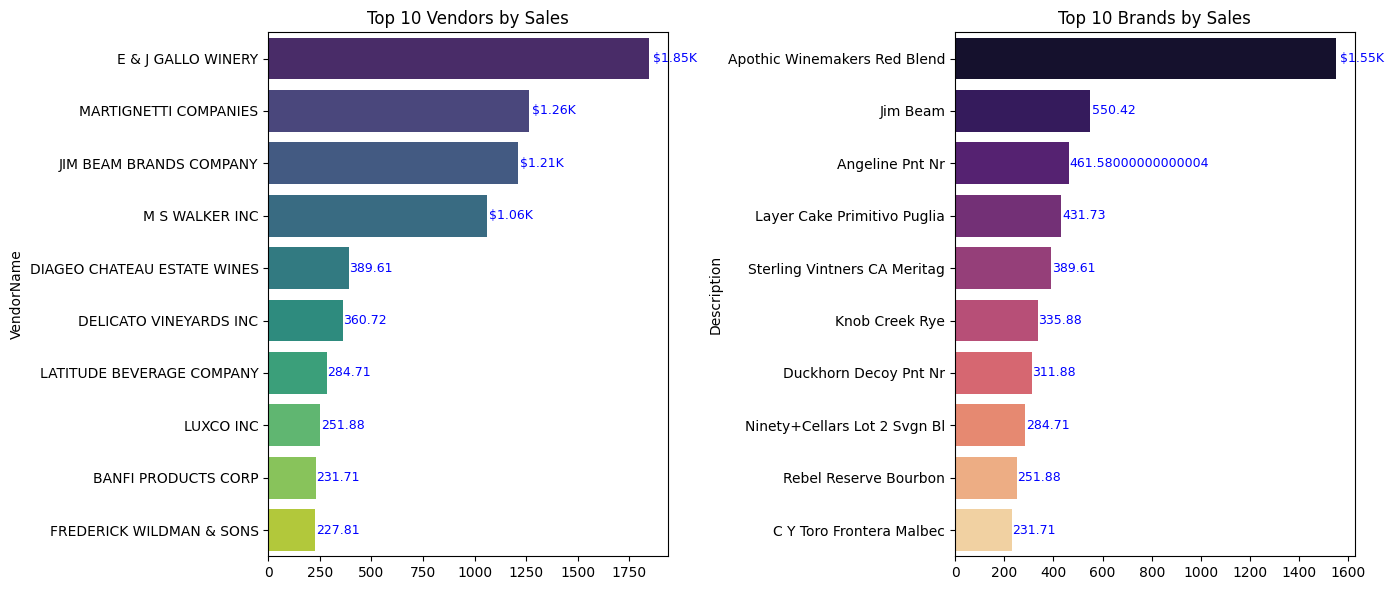

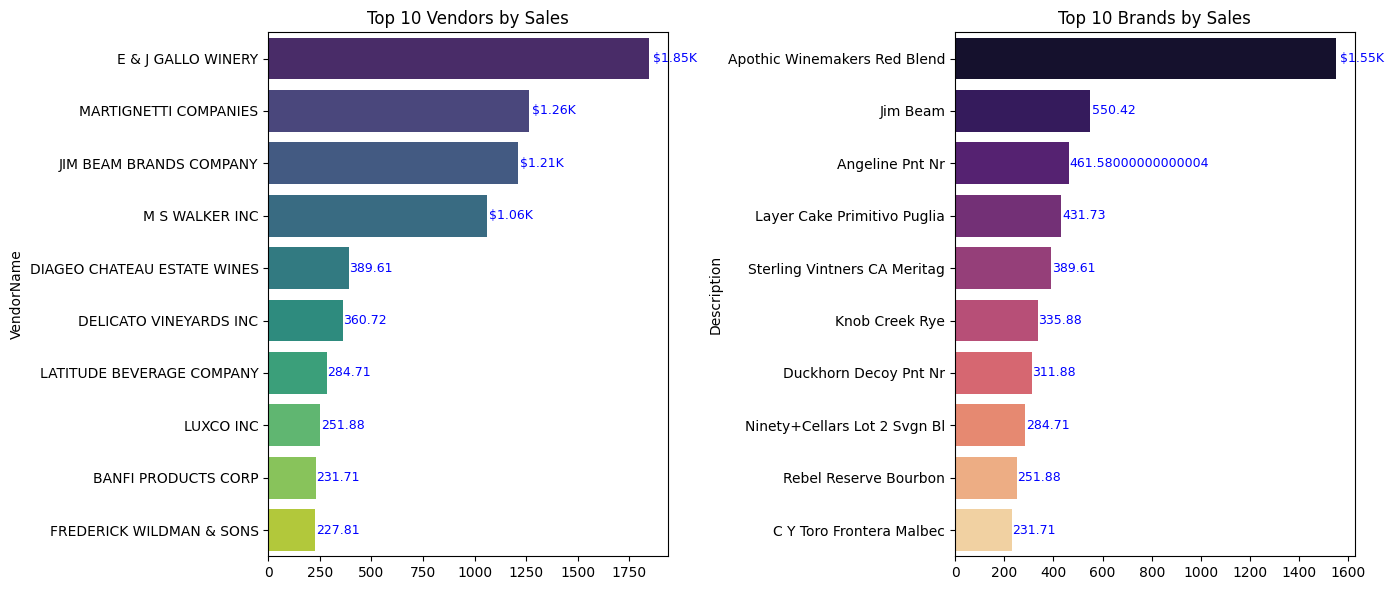

In [80]:

%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot for top vendors
sns.barplot(x=top_vendors.values, y=top_vendors.index, palette='viridis', ax=ax1)
ax1.set_title('Top 10 Vendors by Sales')

for bar in ax1.patches:
    ax1.text(
        bar.get_width() + (bar.get_width() * 0.01),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=9, color='blue'
    )

# Plot for top brands
sns.barplot(x=top_brands.values, y=top_brands.index.astype(str), palette='magma', ax=ax2)
ax2.set_title('Top 10 Brands by Sales')

for bar in ax2.patches:
    ax2.text(
        bar.get_width() + (bar.get_width() * 0.01),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=9, color='blue'
    )

plt.tight_layout()
plt.show()
display(fig)


Which vendor contribute the most to total purchase dollars?

In [81]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'GrossProfit': 'sum',
    'TotalSalesDollars': 'sum'
}).reset_index()

In [87]:
vendor_performance['PurchaseContribution%'] = (
    vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()
) * 100

vendor_performance['PurchaseContribution%'] = vendor_performance['PurchaseContribution%'].round(2)


In [86]:
vendor_performance.sort_values('PurchaseContribution%', ascending=False)

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
6,E & J GALLO WINERY,1669.96,175.27,1845.23,31.44
8,JIM BEAM BRANDS COMPANY,995.73,214.30,1210.03,18.75
12,MARTIGNETTI COMPANIES,924.84,339.40,1264.24,17.41
11,M S WALKER INC,731.88,329.08,1060.96,13.78
3,DELICATO VINEYARDS INC,240.60,120.12,360.72,4.53
1,BROWN-FORMAN CORP,130.20,81.73,211.93,2.45
9,LATITUDE BEVERAGE COMPANY,128.64,156.07,284.71,2.42
2,CRUSH WINES,102.00,122.91,224.91,1.92
5,DIAGEO NORTH AMERICA INC,102.15,94.81,196.96,1.92
7,FREDERICK WILDMAN & SONS,94.08,133.73,227.81,1.77


In [88]:
print(top_vendors.columns.tolist())


AttributeError: 'Series' object has no attribute 'columns'

In [85]:
top_vendors[cummulative_contribution] = top_vendors['PurchaseContribution%'].cumsum().round(2)

KeyError: 'PurchaseContribution%'

In [ ]:
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_contribution
0,BANFI PRODUCTS CORP,28.92,202.79,231.71,0.54,0.54
1,BROWN-FORMAN CORP,130.2,81.73,211.93,2.45,2.99
2,CRUSH WINES,102.0,122.91,224.91,1.92,4.91
3,DELICATO VINEYARDS INC,240.6,120.12,360.72,4.53,9.44
4,DIAGEO CHATEAU ESTATE WINES,68.38,321.23,389.61,1.29,10.73


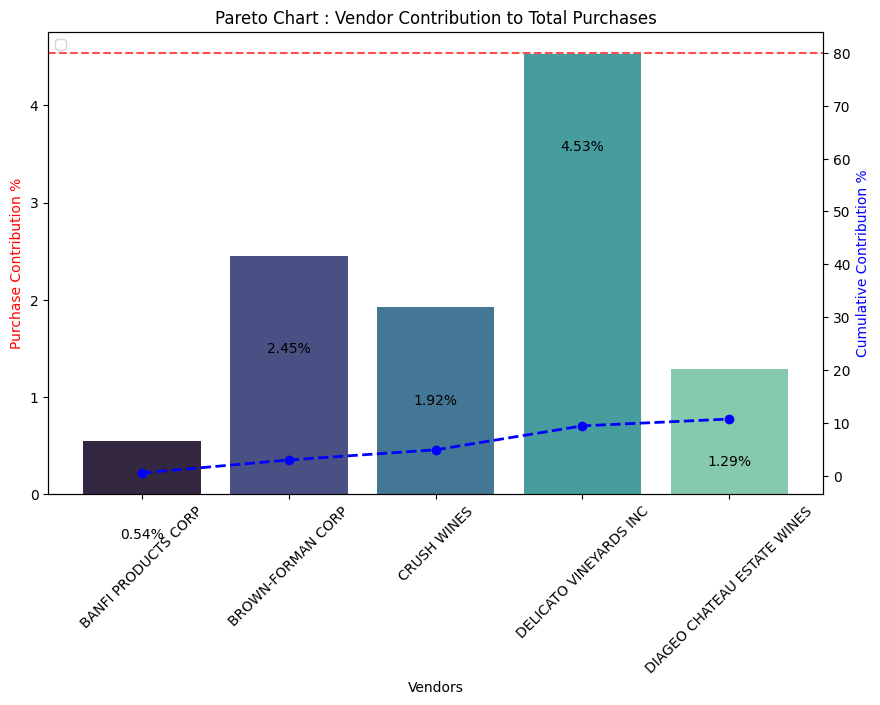

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for Purchase Contribution %
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette='mako', ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value -1, str(value)+'%', ha='center', color='black')

# Line plot for Cumulative Contribution %
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_contribution'], color='Blue', marker='o', linewidth=2, linestyle='--')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=45)
ax1.set_ylabel('Purchase Contribution %', color='red')
ax2.set_ylabel('Cumulative Contribution %', color='Blue')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart : Vendor Contribution to Total Purchases')
ax2.axhline(y=80, color='red', linestyle='--', alpha=0.7)
ax2.legend(loc = 'upper left')
plt.show()


How much of total procurement is dependent on the top vendors?

In [ ]:
print(f"Total Purchase Contribution by Top 5 Vendors: {round(top_vendors['PurchaseContribution%'].sum(),2)}%")

Total Purchase Contribution by Top 5 Vendors: 10.73%


In [ ]:
vendors = list(top_vendors['VendorName'].values)
purchase_contribution = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contribution)
remaining_contribution = 100 - total_contribution

# Append 'Others' category
vendors.append('Others Vendors')
purchase_contribution.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(purchase_contribution, labels=vendors, autopct='%1.1f%%', startangle=140, pctdistance=0.85,colors=plt.cm.tab20.colors)

# Draw a white circle at the center to create a donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# add total contribution annotation in the center
ax.text(0, 0, f"Top 5 Vendors\n{total_contribution:.2f}%", horizontalalignment='center', verticalalignment='center', fontsize=12, fontweight='bold')

plt.title('Purchase Contribution by Top 5 Vendors', fontsize=14)
plt.show()

KeyError: 'VendorName'

Does purchasing in bulk reduce the unit price, and what is the optional purchase volume for cost savings?

In [ ]:
df['UnitPrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [ ]:
df['OrderSize'] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=['Small', 'Medium', 'Large'])

In [ ]:
df['OrderSize'] 

0      Large
1      Large
2      Large
3      Large
4      Large
5      Large
6      Large
7      Large
8     Medium
9      Small
10     Small
11     Large
12    Medium
13     Small
14    Medium
15     Small
16     Small
17    Medium
18    Medium
19     Small
20    Medium
21    Medium
22    Medium
23     Large
24    Medium
25     Small
26     Small
27     Small
Name: OrderSize, dtype: category
Categories (3, object): ['Small' < 'Medium' < 'Large']

In [ ]:
df.groupby('OrderSize')[['UnitPrice']].mean()

,UnitPrice
OrderSize,
Small,14.531111
Medium,8.183333
Large,8.462000


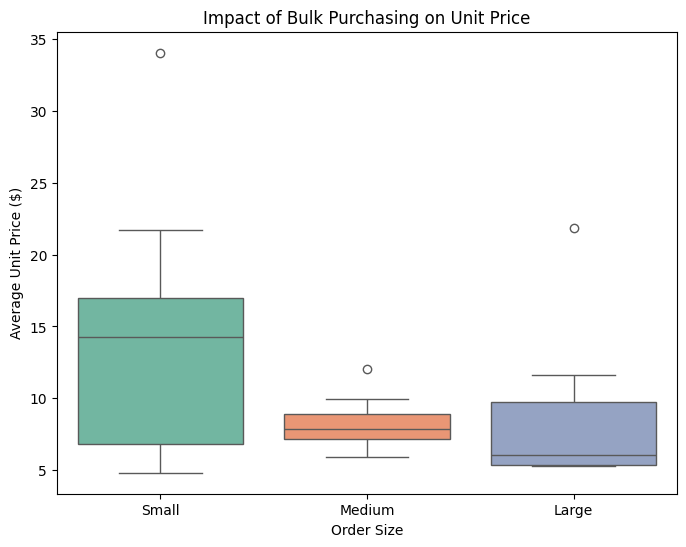

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='OrderSize', y='UnitPrice', data=df, palette='Set2')
plt.title('Impact of Bulk Purchasing on Unit Price')
plt.xlabel('Order Size')
plt.ylabel('Average Unit Price ($)')
plt.show()

- Vendors buying in bulk (Large Order size) get the lowest unit price, meaning higher margin if they can manage inventory efficently.
- The price difference between small and Large orers is substantial.
- This suggests that bulk pricing stratigiessuccesfully encourage vendors to purchase in large volumes, leading to higher overall sales depite lower per unit revenue.

-------------------------------------------------------------------------------------------------------------------------------------------------------

Which vendor have low inventory turnover, indicating excess stock andslowmoving products?

In [ ]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values(by='StockTurnover', ascending=True)

,StockTurnover
VendorName,
MARTIGNETTI COMPANIES,0.666667
DELICATO VINEYARDS INC,0.675000
M S WALKER INC,0.722466
E & J GALLO WINERY,0.803897
JIM BEAM BRANDS COMPANY,0.864103


How much capital is locked in unsold inventory per vendor, and which vendor contribute the most to it?

In [ ]:
df["UnsoldInventoryValue"] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
print("Total Unsold Capital:", format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Capital: 531.8800000000001


In [ ]:
# Aggregate Capital Locked per vendor 
inventory_value_per_vendor = df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()

# Sort vendors with highest locked capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by='UnsoldInventoryValue', ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(lambda x: format_dollars(x))
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
6,E & J GALLO WINERY,632.39
12,MARTIGNETTI COMPANIES,165.14
11,M S WALKER INC,136.22
8,JIM BEAM BRANDS COMPANY,88.29
3,DELICATO VINEYARDS INC,39.61
1,BROWN-FORMAN CORP,-21.7
9,LATITUDE BEVERAGE COMPANY,-26.8
5,DIAGEO NORTH AMERICA INC,-34.05
2,CRUSH WINES,-51.0
7,FREDERICK WILDMAN & SONS,-54.879999999999995


What is the 95% confidence intervals for profit margins of top performing and low performing vendors.

In [ ]:
top_thershold = df['TotalSalesDollars'].quantile(0.75)
low_thershold = df['TotalSalesDollars'].quantile(0.25)

In [ ]:
top_vendors = df[df['TotalSalesDollars'] >= top_thershold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_thershold]['ProfitMargin'].dropna()

In [ ]:
top_vendors

0      5.846492
1     16.391120
2      2.331190
3     32.328090
4     10.657945
5     40.740741
23    82.449116
Name: ProfitMargin, dtype: float64

In [ ]:


def confidence_interval(data, confidence=0.95):
    mean_value = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_value, mean_value - margin_of_error, mean_value + margin_of_error


In [ ]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% Confidence Interval: ({top_lower:.2f}, {top_upper:.2f}) Mean: {top_mean:.2f}")
print(f"Low Vendors 95% Confidence Interval: ({low_lower:.2f}, {low_upper:.2f}) Mean: {low_mean:.2f}")


Top Vendors 95% Confidence Interval: (1.29, 53.21) Mean: 27.25
Low Vendors 95% Confidence Interval: (14.64, 57.83) Mean: 36.23


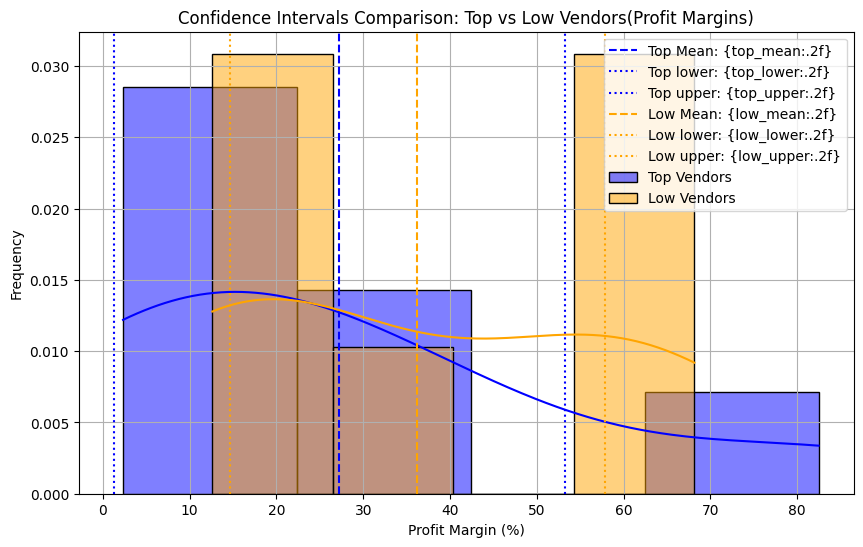

In [ ]:
plt.figure(figsize=(10,6))
           
# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color='blue', label='Top Vendors', stat='density')
plt.axvline(top_mean, color='blue', linestyle='--', label='Top Mean: {top_mean:.2f}')
plt.axvline(top_lower, color='blue', linestyle=':', label='Top lower: {top_lower:.2f}')
plt.axvline(top_upper, color='blue', linestyle=':', label='Top upper: {top_upper:.2f}')

# Low Vendors Plots
sns.histplot(low_vendors, kde=True, color='orange', label='Low Vendors', stat='density')
plt.axvline(low_mean, color='orange', linestyle='--', label='Low Mean: {low_mean:.2f}')
plt.axvline(low_lower, color='orange', linestyle=':', label='Low lower: {low_lower:.2f}')
plt.axvline(low_upper, color='orange', linestyle=':', label='Low upper: {low_upper:.2f}')

# Finalize Plot
plt.title('Confidence Intervals Comparison: Top vs Low Vendors(Profit Margins)')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

- The confidence interval for low performing vendors is significantly higher than that of top performing vendors .
- This suggest that vendor with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs .
- For High performing vendors if they aim to improve profitiability , they could explore selective price adjustment , cost optimization , or building stratigies.
- For low performing vendors despite higher margins their low sales volume might indicates a need forbetter marketing , competitive pricing or improved distribution startigies.

---------------------------------------------------------------------------------------------------------------------------------------------------------

Is there a significant diferrence in the profit margin between top performing and low performing vendors?

HYPOTHESIS

H₀ (Null Hypothesis): There is a significant difference in the margin in the mean profit margin of top performing and low performing vendors.

H₁ (Alternative Hypothesis): The mean profit margin of top performing and low performing vendors are significantly different. 

In [ ]:
top_thershold = df['TotalSalesDollars'].quantile(0.75)
low_thershold = df['TotalSalesDollars'].quantile(0.25)

top_vendors = df[df['TotalSalesDollars'] >= top_thershold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars'] <= low_thershold]['ProfitMargin'].dropna()

# perform t-test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# print results
print(f"T-statistic: {t_stat}, P-value: {p_value:4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the mean profit margin of top performing and low performing vendors.")
else:
    print("Fail to reject the null hypothesis: No significant difference in the mean profit margin of top performing and low performing vendors.")

T-statistic: -0.6508026183169885, P-value: 0.527838
Fail to reject the null hypothesis: No significant difference in the mean profit margin of top performing and low performing vendors.
